Epoch: 0050 cost= 0.726656556 W= 1.71955 b= 2.19497
Epoch: 0100 cost= 0.303039104 W= 1.46467 b= 3.18857
Epoch: 0050 cost= 0.126377165 W= 1.30008 b= 3.83021
Epoch: 0100 cost= 0.052703530 W= 1.19378 b= 4.24457
Epoch: 0150 cost= 0.021979021 W= 1.12514 b= 4.51216
Epoch: 0200 cost= 0.009165775 W= 1.08081 b= 4.68497
Optimization Finished!
Training cost= 0.00916578 W= 1.08081 b= 4.68497 



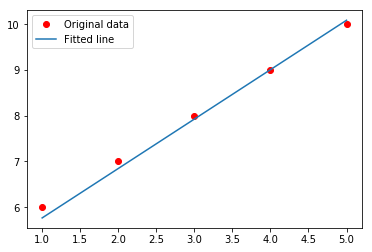

Epoch: 0050 cost= 0.008214617 W= 1.08236 b= 4.69941
Epoch: 0100 cost= 0.007544321 W= 1.07918 b= 4.71197
Epoch: 0050 cost= 0.006930759 W= 1.07591 b= 4.72393
Epoch: 0100 cost= 0.006367083 W= 1.07276 b= 4.73539
Epoch: 0150 cost= 0.005849266 W= 1.06974 b= 4.74638
Epoch: 0200 cost= 0.005373582 W= 1.06684 b= 4.75691
Optimization Finished!
Training cost= 0.00537358 W= 1.06684 b= 4.75691 



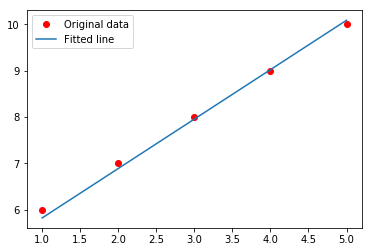

[0.009165775, 0.0053735822]


In [15]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

rate_list=[0.05,0.005]
epoch_list=[100,200]
j=[]
#learning_rate = 0.005
#training_epochs = 1000
display_step = 50

train_X = numpy.asarray([1,2,3,4,5])
train_Y = numpy.asarray([6,7,8,9,10])
n_samples = train_X.shape[0]

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

pred = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for rate in rate_list:
        optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
        for training_epochs in epoch_list:
            #optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
            for epoch in range(training_epochs):
                for (x, y) in zip(train_X, train_Y):
                    sess.run(optimizer, feed_dict={X: x, Y: y})
                if (epoch+1) % display_step == 0:
                    c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
                    print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
        print("Optimization Finished!")
        training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
        print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
        j.append(training_cost)
        plt.plot(train_X, train_Y, 'ro', label='Original data')
        plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()
    
print(j)